# Classificação - Predict Students' Dropout and Academic Success

Integrantes:

Julio Cesar Bonow Manoel,
Rafael Henrique Ramos,
Vitor Vidotto Modesto Tozi


Descrição: Esse Dataset consiste em procurar padrões entre a taxa de sucesso e de abandono do curso de várias instituições de ensino superior em diversos cursos. O conjunto de dados inclui informações conhecidas no momento da matrícula do estudante (trajetória acadêmica, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos estudantes ao final do primeiro e segundo semestres.



O Dataset consiste em cerca de 4424 dados de alunos com 37 colunas, sendo elas:

- Marital status
- Application mode
- Application order
- Course
- Daytime/evening attendance
- Previous qualification
- Previous qualification (grade)
- Nationality
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation
- Admission grade
- Displaced
- Educational special needs
- Debtor
- Tuition fees up to date
- Gender
- Scholarship holder
- Age at enrollment
- International
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (evaluations)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (evaluations)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (without evaluations)
- Unemployment rate
- Inflation rate
- GDP
- Target


# 1 - Seleção de Dados

Link do Kaggle: https://www.kaggle.com/datasets/syedfaizanalii/predict-students-dropout-and-academic-success


Link da Documentação do Dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep=';', index_col=None)

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 2 - Pré - Processamento dos Dados

Essa etapa consiste em verificação de itens nulos (vazios), normalização dos dados e tratamento de valores categóricos ou de muitos atributos diferentes em uma mesma coluna.

In [ ]:
#Verificação da quantidade de itens nulos
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
#Verificação das colunas e tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Verificar valores estastísticos
df.describe().T #.T permite com que inverta as linhas com as colunas para melhor visualização



,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
#Verificação das classes-alvo disponíveis e quantidade

df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


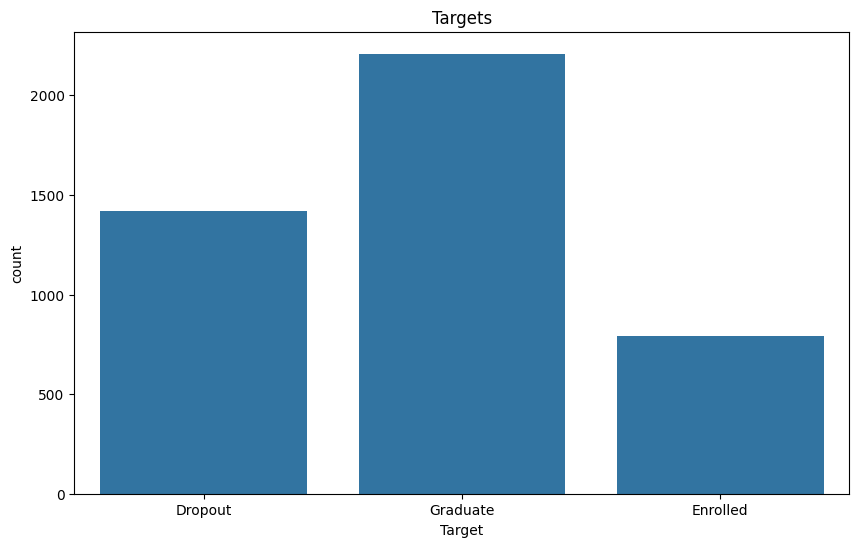

In [ ]:
#Visualização em forma de gráfico

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.title('Targets')
plt.show()

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


Acredito que manter essas proporções é importante por hora, caso ela venha atrapalhar o modelo, podemos utilizar de outras métricas de validação na hora.

In [ ]:
#Transformar a classe em Target em Números
df_nova_base = df.copy()
df_nova_base['Target'] = df_nova_base['Target'].map({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})
df_nova_base['Target'].value_counts()

,count
Target,
1,2209
0,1421
2,794


Esse Dataset possui muitos dados categóricos, podemos citar algum deles como:

- Marital status (vai de 1 a 6)
- Application mode (vários códigos de dados, não tem ordem e vai de 1 a 57)
- Application order (vai de 0 a 9, com base na primeira até última escolha)
- Course (Código do curso, não tem uma ordem)
- Daytime/evening attendance (0 - Evening e 1 - Daytime)
- Previous qualification (Não possui ordem e tem muitas classes)
- Nationality (Código do país em questão)
- Mother's qualification (Não possui ordem e tem muitas classificação)
- Father's qualification (Não possui ordem e tem muitas classificação)
- Mother's occupation (Não possui ordem e tem muitas classes)
- Father's occupation (Não possui ordem e tem muitas classes)
- Displaced (0 ou 1)
- Educational special needs (0 ou 1)
- Debtor (0 ou 1)
- Tuition fees up to date (0 ou 1)
- Gender (0 ou 1)
- Scholarship holder (0 ou 1)
- International (0 ou 1)


Para esses dados que possuem muitas variações em seus atributos, podemos pensar em reorganizar de uma outra forma, como por exemplo o curso, separar em áreas como Exatas e Tecnologia, Humanas, Saúde e etc.

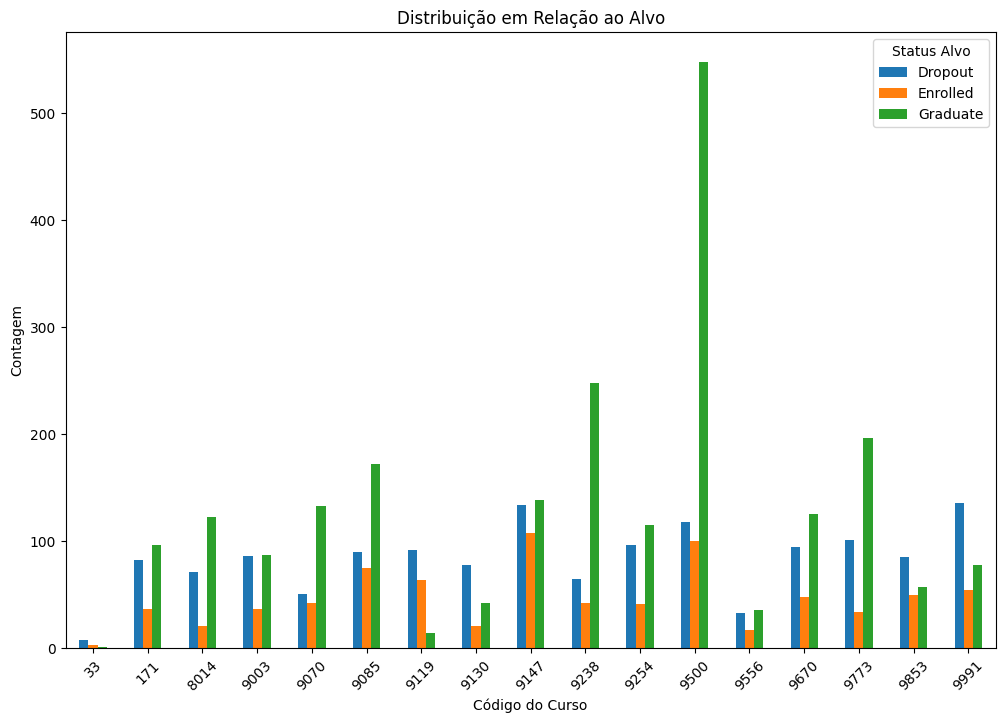

In [ ]:
#Visualização da distribuição entre cursos.
curso = df.groupby(["Course", "Target"]).size().unstack()

curso.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("Código do Curso")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Dicionário para mapear cursos para as categorias 1 a 4
curso_categoria = {
    33: 1,   # Biofuel Production Technologies -> Tecnologia e Exatas
    9119: 1, # Informatics Engineering -> Tecnologia e Exatas

    171: 2,  # Animation and Multimedia Design -> Humanas
    8014: 2, # Social Service (evening attendance) -> Humanas
    9238: 2, # Social Service -> Humanas
    9670: 2, # Advertising and Marketing Management -> Humanas
    9773: 2, # Journalism and Communication -> Humanas
    9853: 2, # Basic Education -> Humanas

    9147: 3, # Management -> Administração
    9991: 3, # Management (evening attendance) -> Administração
    9254: 3, # Tourism -> Administração

    9003: 4, # Agronomy -> Saúde
    9070: 4, # Communication Design -> Saúde
    9085: 4, # Veterinary Nursing -> Saúde
    9130: 4, # Equinculture -> Saúde
    9500: 4, # Nursing -> Saúde
    9556: 4  # Oral Hygiene -> Saúde
}

# Substituindo Curso pela separação em áreas
df_nova_base['Course'] = df_nova_base['Course'].map(curso_categoria)



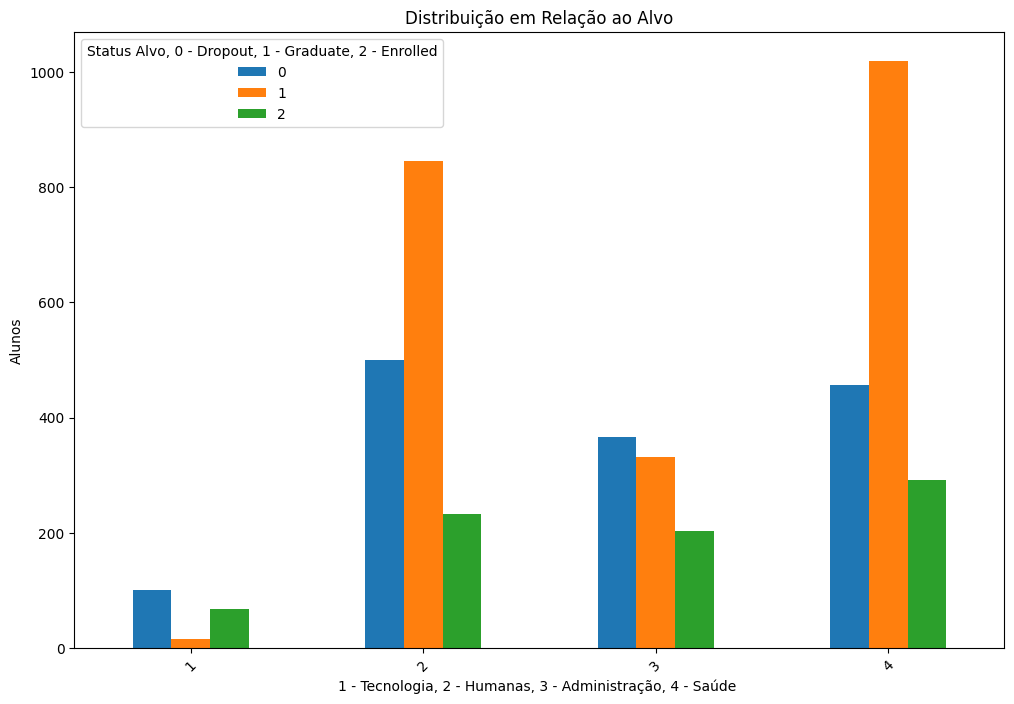

In [ ]:
#Visualização da distribuição entre cursos.
curso = df_nova_base.groupby(["Course", "Target"]).size().unstack()

curso.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("1 - Tecnologia, 2 - Humanas, 3 - Administração, 4 - Saúde ")
plt.ylabel("Alunos")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

Podemos fazer isso com relação a ocupação e escolaridade dos pais.

In [ ]:
# Categorizar o nível educacional em 1, 2 e 3
nivel_educacional = {
    # Nível Básico de Ensino (1)
    1: 1,   # Secondary Education - 12th Year of Schooling or Eq.
    9: 1,   # 12th Year of Schooling - Not Completed
    10: 1,  # 11th Year of Schooling - Not Completed
    11: 1,  # 7th Year (Old)
    12: 1,  # Other - 11th Year of Schooling
    13: 1,  # 2nd year complementary high school course
    14: 1,  # 10th Year of Schooling
    19: 1,  # Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    20: 1,  # Complementary High School Course
    26: 1,  # 7th year of schooling
    27: 1,  # 2nd cycle of the general high school course
    29: 1,  # 9th Year of Schooling - Not Completed
    30: 1,  # 8th year of schooling
    37: 1,  # Basic education 1st cycle (4th/5th year) or equiv.
    38: 1,  # Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

    # Nível Superior ou Técnico (2)
    2: 2,   # Higher Education - Bachelor's Degree
    3: 2,   # Higher Education - Degree
    4: 2,   # Higher Education - Master's
    5: 2,   # Higher Education - Doctorate
    6: 2,   # Frequency of Higher Education
    18: 2,  # General commerce course
    22: 2,  # Technical-professional course
    25: 2,  # Complementary High School Course - not concluded
    31: 2,  # General Course of Administration and Commerce
    33: 2,  # Supplementary Accounting and Administration
    39: 2,  # Technological specialization course
    40: 2,  # Higher education - degree (1st cycle)
    41: 2,  # Specialized higher studies course
    42: 2,  # Professional higher technical course
    43: 2,  # Higher Education - Master (2nd cycle)
    44: 2,  # Higher Education - Doctorate (3rd cycle)

    # Outros (3)
    34: 3,  # Unknown
    35: 3,  # Can't read or write
    36: 3   # Can read without having a 4th year of schooling
}

# Aplicando o mapeamento para Mother's qualification e Father's qualification
df_nova_base['Mother\'s qualification'] = df_nova_base['Mother\'s qualification'].map(nivel_educacional)
df_nova_base['Father\'s qualification'] = df_nova_base['Father\'s qualification'].map(nivel_educacional)

print("Dataset Base")
print(df[['Mother\'s qualification', 'Father\'s qualification']].head())
print("Dataset Categorizado")
print(df_nova_base[['Mother\'s qualification', 'Father\'s qualification']].head())

Dataset Base
   Mother's qualification  Father's qualification
0                      19                      12
1                       1                       3
2                      37                      37
3                      38                      37
4                      37                      38
Dataset Categorizado
   Mother's qualification  Father's qualification
0                       1                       1
1                       1                       2
2                       1                       1
3                       1                       1
4                       1                       1


In [ ]:
# Categorização da Ocupação em nível de 1, 2, 3, 4 e 5

ocupacao_categoria = {
    # Categoria 1 - Estudante
    0: 1,   # Student

    # Categoria 2 - Trabalhos Especializados ou de nível superior
    1: 2,   # Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    2: 2,   # Specialists in Intellectual and Scientific Activities
    122: 2, # Health professionals
    123: 2, # Teachers
    125: 2, # Specialists in information and communication technologies (ICT)

    # Categoria 3 - Trabalhos Gerais ou Não Especializados
    3: 3,   # Intermediate Level Technicians and Professions
    4: 3,   # Administrative staff
    131: 3, # Intermediate level science and engineering technicians and professions
    132: 3, # Technicians and professionals, of intermediate level of health
    134: 3, # Intermediate level technicians from legal, social, sports, cultural and similar services
    5: 3,   # Personal Services, Security and Safety Workers and Sellers
    6: 3,   # Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    7: 3,   # Skilled Workers in Industry, Construction and Craftsmen
    8: 3,   # Installation and Machine Operators and Assembly Workers
    141: 3, # Office workers, secretaries in general and data processing operators
    143: 3, # Data, accounting, statistical, financial services and registry-related operators
    144: 3, # Other administrative support staff
    151: 3, # Personal service workers
    152: 3, # Sellers
    153: 3, # Personal care workers and the like
    171: 3, # Skilled construction workers and the like, except electricians
    173: 3, # Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
    175: 3, # Workers in food processing, woodworking, clothing and other industries and crafts
    191: 3, # Cleaning workers

    # Categoria 4 - Outros
    10: 4,   # Armed Forces Professions
    90: 4,   # Other Situation
    194: 4,  # Meal preparation assistants
    195: 4,  # Street vendors (except food) and street service providers


    # Categoria 5 - Sem especialização ou Vazio
    9: 5,    # Unskilled Workers
    99: 5,   # (blank)
    192: 5,  # Unskilled workers in agriculture, animal production, fisheries and forestry
    193: 5   # Unskilled workers in extractive industry, construction, manufacturing and transport
}

# Aplicando no dataset 'Mother's occupation' e 'Father's occupation'
df_nova_base['Mother\'s occupation'] = df_nova_base['Mother\'s occupation'].map(ocupacao_categoria)
df_nova_base['Father\'s occupation'] = df_nova_base['Father\'s occupation'].map(ocupacao_categoria)

# Exibindo as primeiras linhas para verificar
print(df_nova_base[['Mother\'s occupation', 'Father\'s occupation']].head())

   Mother's occupation  Father's occupation
0                    3                  5.0
1                    3                  3.0
2                    5                  5.0
3                    3                  3.0
4                    5                  5.0


Por fim, existe a coluna "Previous qualification", acho que podemos mudar para um binário, isto é, se essa é a segunda graduação ou a primeira dele.

In [ ]:
# Dicionário de mapeamento para categorizar Previous qualification em 0 e 1
qualificacao_categoria = {
    # Primeira Qualificação (1)
    1: 1,   # Secondary education
    9: 1,   # 12th year of schooling - not completed
    10: 1,  # 11th year of schooling - not completed
    12: 1,  # Other - 11th year of schooling
    14: 1,  # 10th year of schooling
    15: 1,  # 10th year of schooling - not completed
    19: 1,  # Basic education 3rd cycle (9th/10th/11th year) or equiv.
    38: 1,  # Basic education 2nd cycle (6th/7th/8th year) or equiv.

    # Outro Curso Superior (0)
    2: 0,   # Higher education - bachelor's degree
    3: 0,   # Higher education - degree
    4: 0,   # Higher education - master's
    5: 0,   # Higher education - doctorate
    6: 0,   # Frequency of higher education
    39: 0,  # Technological specialization course
    40: 0,  # Higher education - degree (1st cycle)
    42: 0,  # Professional higher technical course
    43: 0   # Higher education - master (2nd cycle)
}

# Aplicando o mapeamento no 'Previous qualification'
df_nova_base['Previous qualification'] = df_nova_base['Previous qualification'].map(qualificacao_categoria)

# Exibindo as primeiras linhas para verificar
print(df_nova_base[['Previous qualification']].head())


   Previous qualification
0                       1
1                       1
2                       1
3                       1
4                       1


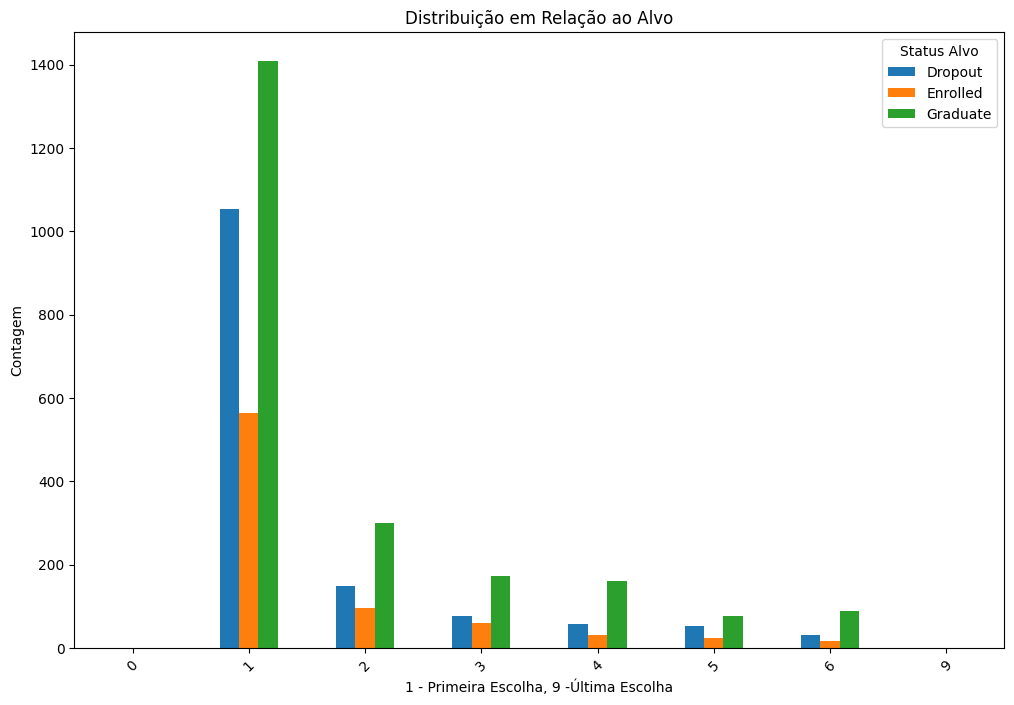

In [ ]:
#Visualização da distribuição entre cursos.
prioridade = df.groupby(["Application order", "Target"]).size().unstack()

prioridade.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("1 - Primeira Escolha, 9 -Última Escolha")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_nova_base['Application order'].value_counts()

,count
Application order,
1,3026
2,547
3,309
4,249
5,154
6,137
9,1
0,1


Acredito que a primeira escolha comece em 1, e termina em 6
mediante a apenas uma amostra nos valores de 0 e 9.

In [ ]:
# Vamos agrupar o 0 e o 9, aos itens mais próximos a eles
df_nova_base['Application order'] = df_nova_base['Application order'].replace({0: 1, 9: 6})


print(df['Application order'].value_counts())

Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64


Feito essas categorizações, conseguimos reduzir a quantidade de categorias (que poderiam passar de 20 por coluna, mais ou menos) para itens menores de 10, fazendo uma generalização do mesmo.

In [ ]:
df_dummy = pd.get_dummies(df_nova_base, columns = ['Course', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation'])



df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Admission grade                                 4424 non-null   float64
 8   Displaced                                       4424 non-null   int64  
 9   Educational special needs                

In [ ]:
#Teremos um problema se a tipagem das novas colunas forem booleanas
#Por isso iremos converter elas para Int
colunas_para_converter = [
    'Course_1', 'Course_2', 'Course_3', 'Course_4',
    'Mother\'s qualification_1', 'Mother\'s qualification_2',
    'Father\'s qualification_1', 'Father\'s qualification_2',
    'Mother\'s occupation_1', 'Mother\'s occupation_2', 'Mother\'s occupation_3',
    'Mother\'s occupation_4', 'Mother\'s occupation_5',
    'Father\'s occupation_1.0', 'Father\'s occupation_2.0',
    'Father\'s occupation_3.0', 'Father\'s occupation_4.0', 'Father\'s occupation_5.0'
]

# Convertendo as colunas especificadas de bool para int
df_dummy[colunas_para_converter] = df_dummy[colunas_para_converter].astype(int)

# Verificando se a conversão foi aplicada corretamente
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Daytime/evening attendance	                     4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Admission grade                                 4424 non-null   float64
 8   Displaced                                       4424 non-null   int64  
 9   Educational special needs                

In [ ]:
df_dummy.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Displaced,Educational special needs,...,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Father's occupation_1.0,Father's occupation_2.0,Father's occupation_3.0,Father's occupation_4.0,Father's occupation_5.0
0,1,17,5,1,1,122.0,1,127.3,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,15,1,1,1,160.0,1,142.5,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,5,1,1,122.0,1,124.8,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1,17,2,1,1,122.0,1,119.6,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2,39,1,0,1,100.0,1,141.5,0,0,...,0,0,0,0,1,0,0,0,0,1


# 3- Análise Exploratória

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


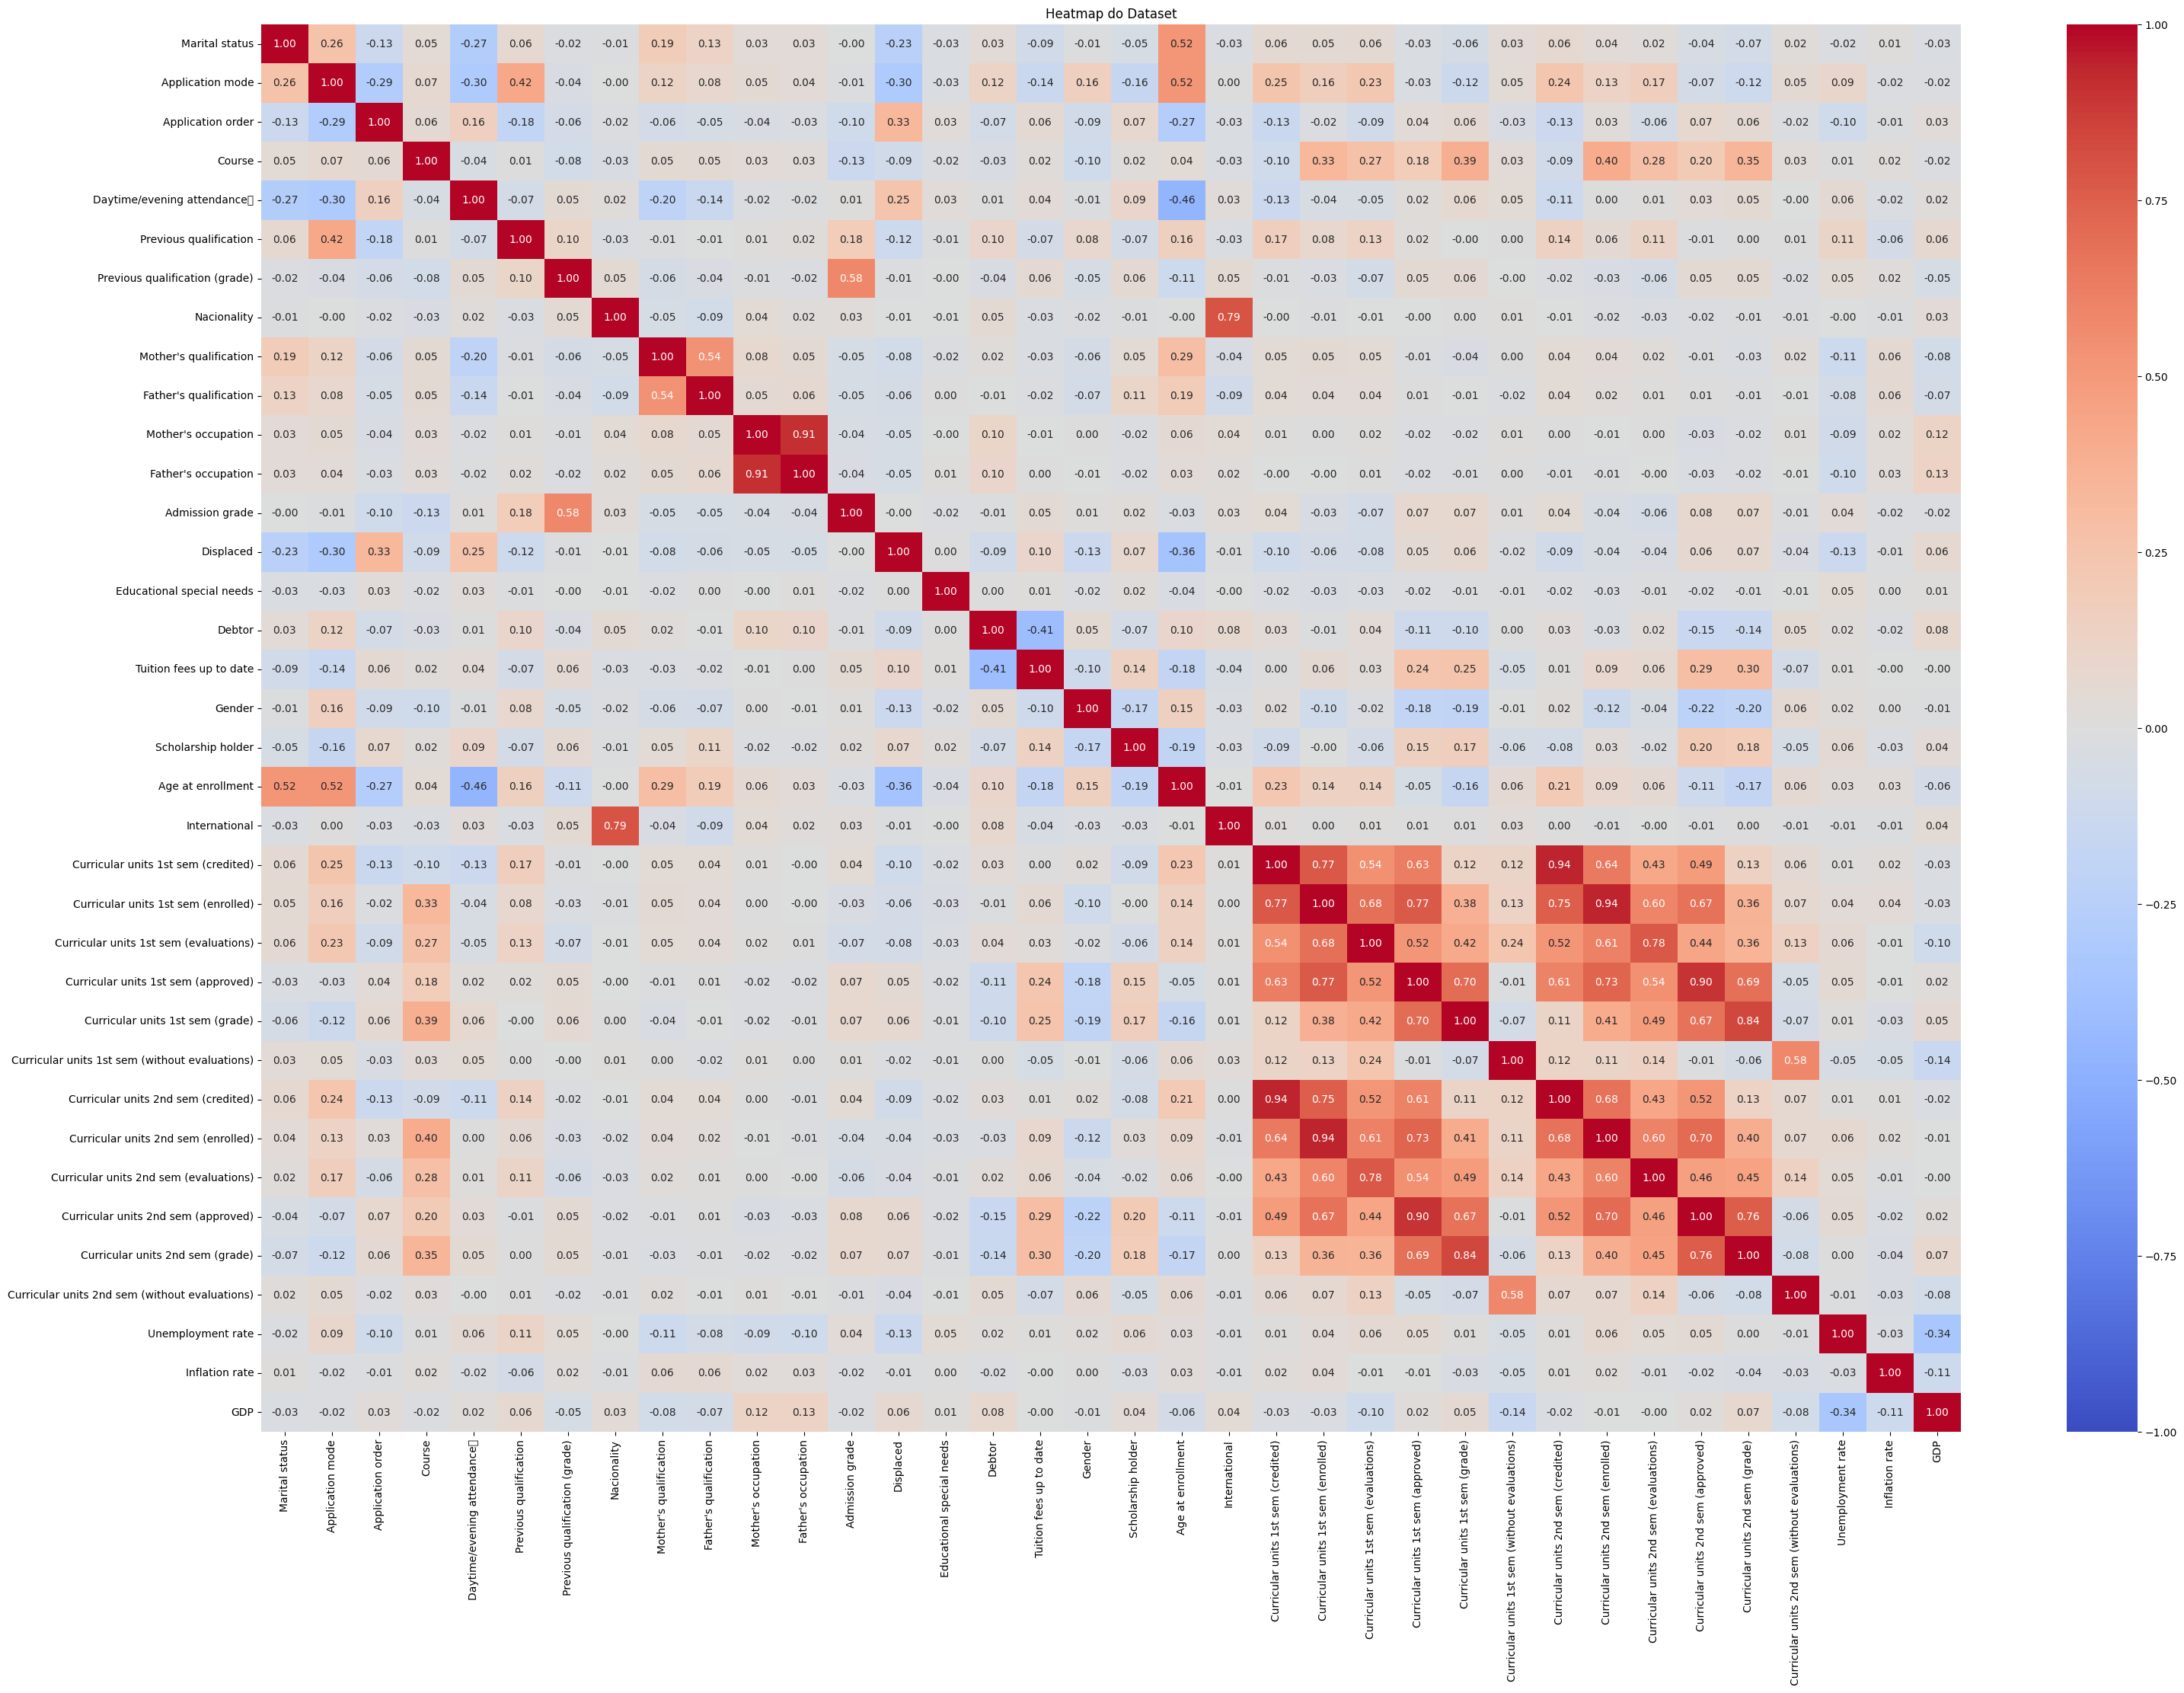

In [ ]:
#Fazer o Heatmap para buscar colunas redundantes
#Primeiro dropar a classe Target

df_heatmap = df.drop(columns = 'Target')

df_heatmap = df_heatmap.corr()

plt.figure(figsize=(36, 24))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap do Dataset")
plt.show()

Como o primeiro problema já foi resolvido, isto é, os Dados categóricos, só faltará retirar elas do heatmap para melhor visualização dos dados.

Para isso, vamos remover elas do novo heatmap.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


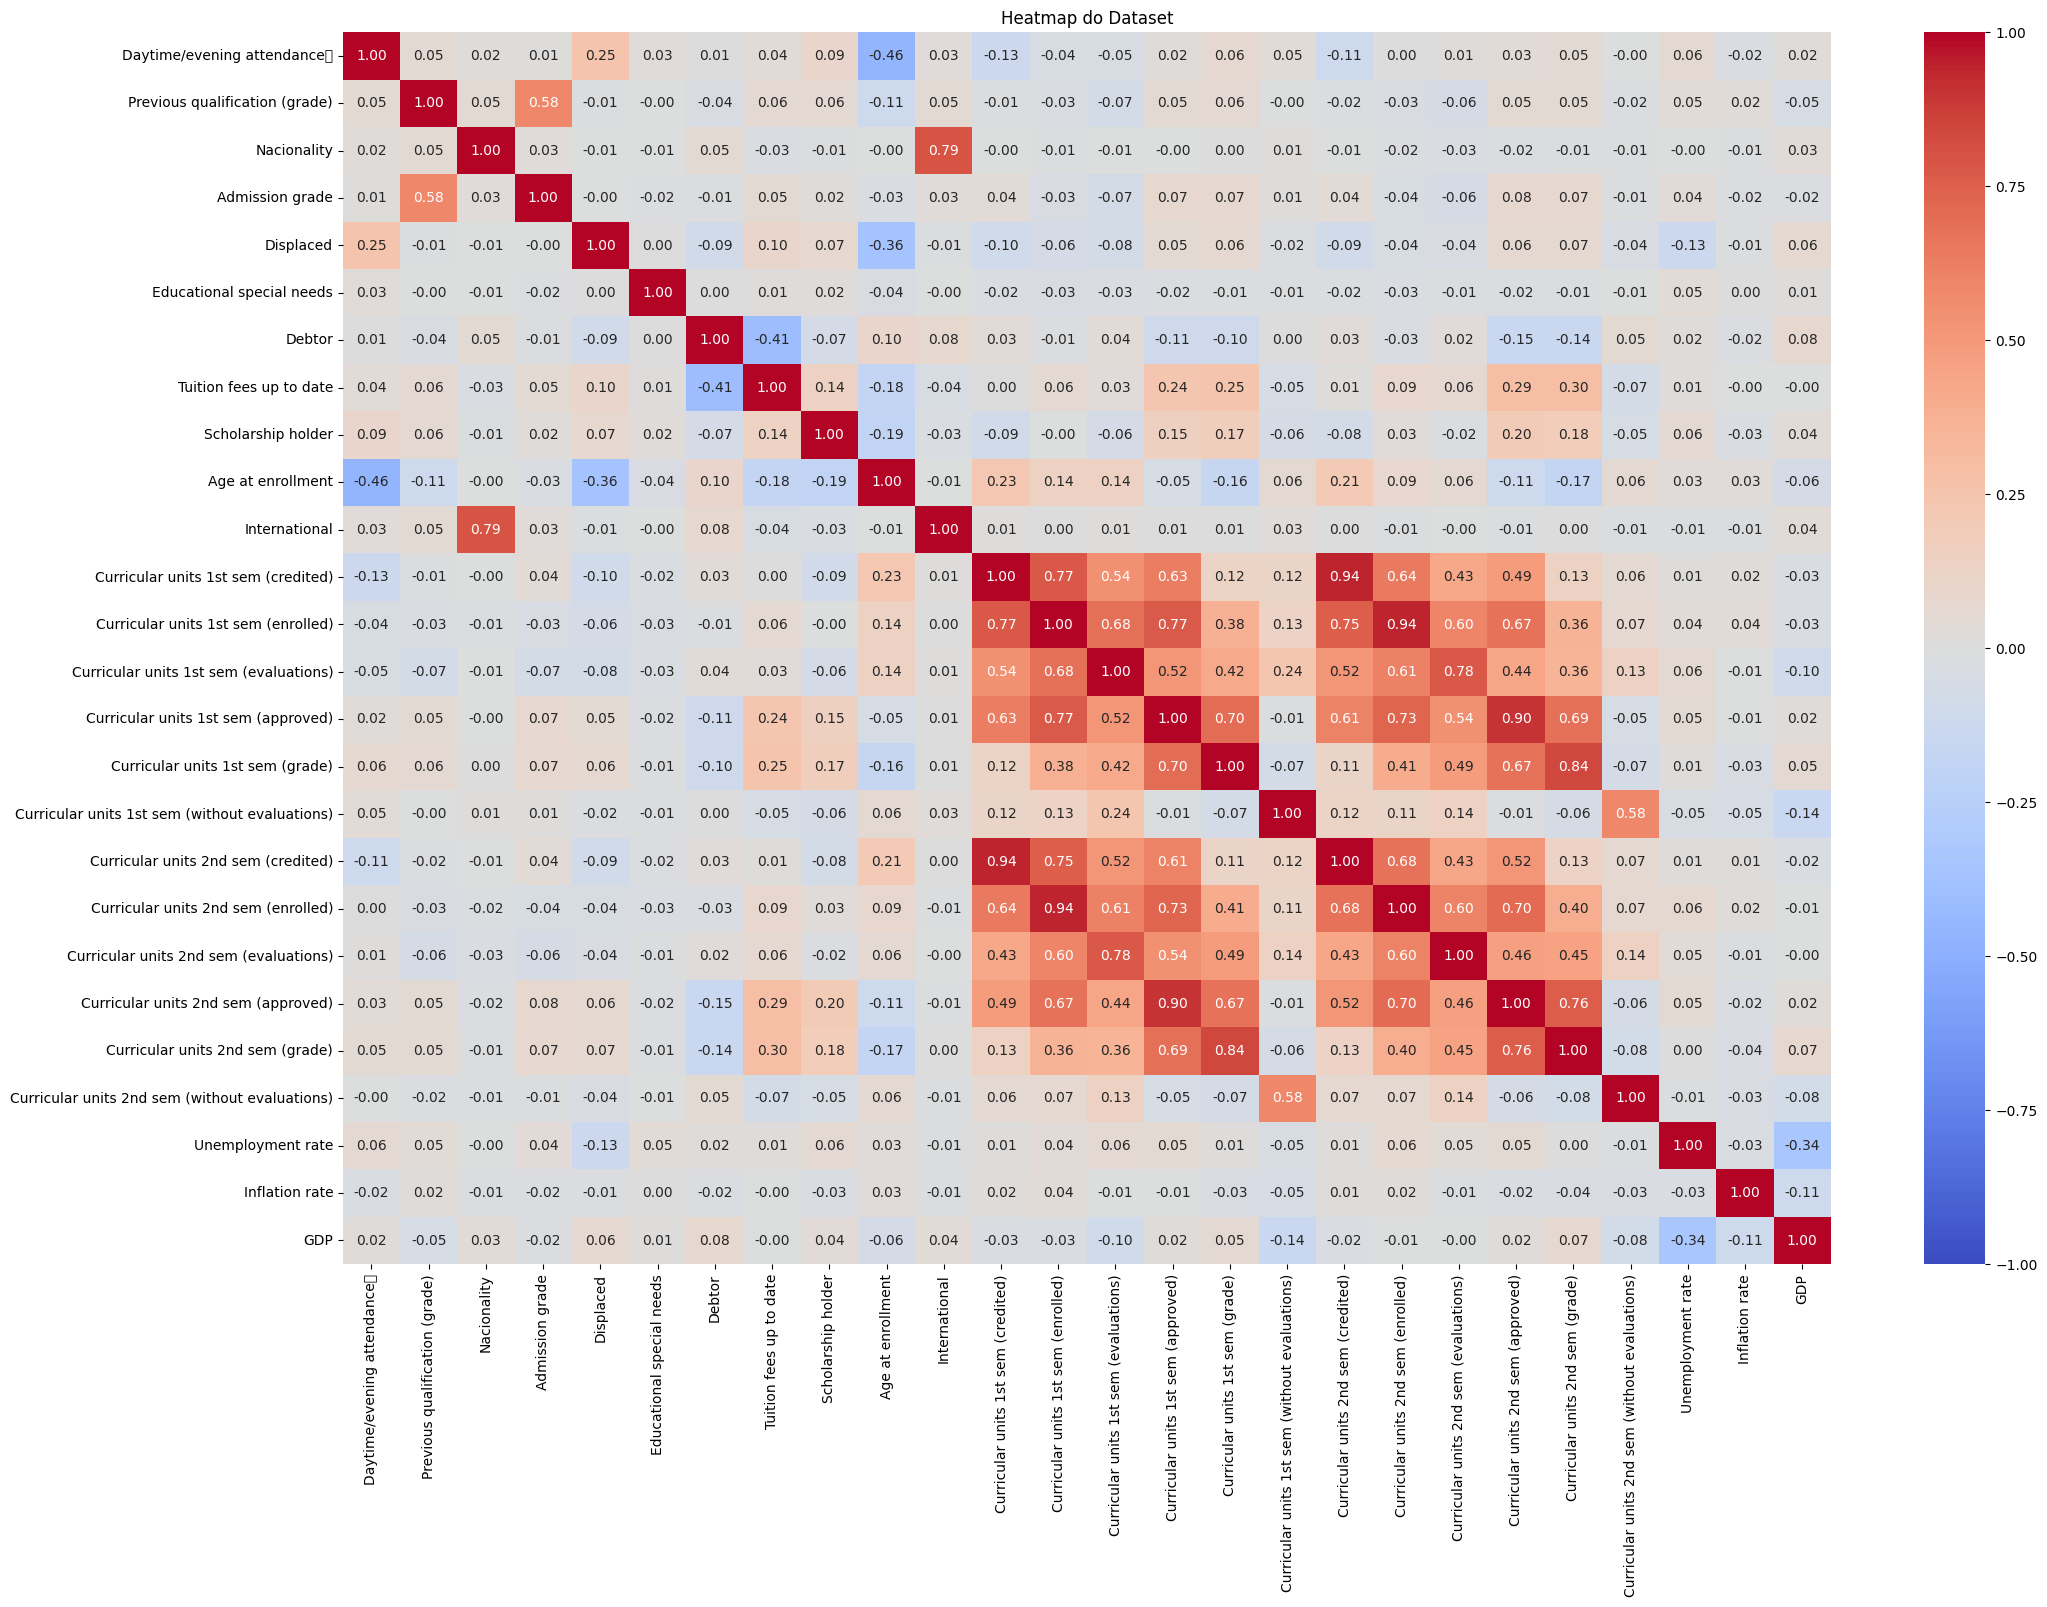

In [ ]:
df_heatmap = df.drop(columns = ['Marital status', 'Application mode', 'Application order',
                                'Course', 'Previous qualification',
                                'Mother\'s qualification', 'Father\'s qualification',
                                'Mother\'s occupation', 'Father\'s occupation',
                                'Gender', 'Target'])

df_heatmap = df_heatmap.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Heatmap do Dataset")
plt.show()

A visualização ainda é um pouco complicada, mas é possível visualizar uma região onde existem correlações muitos altas.

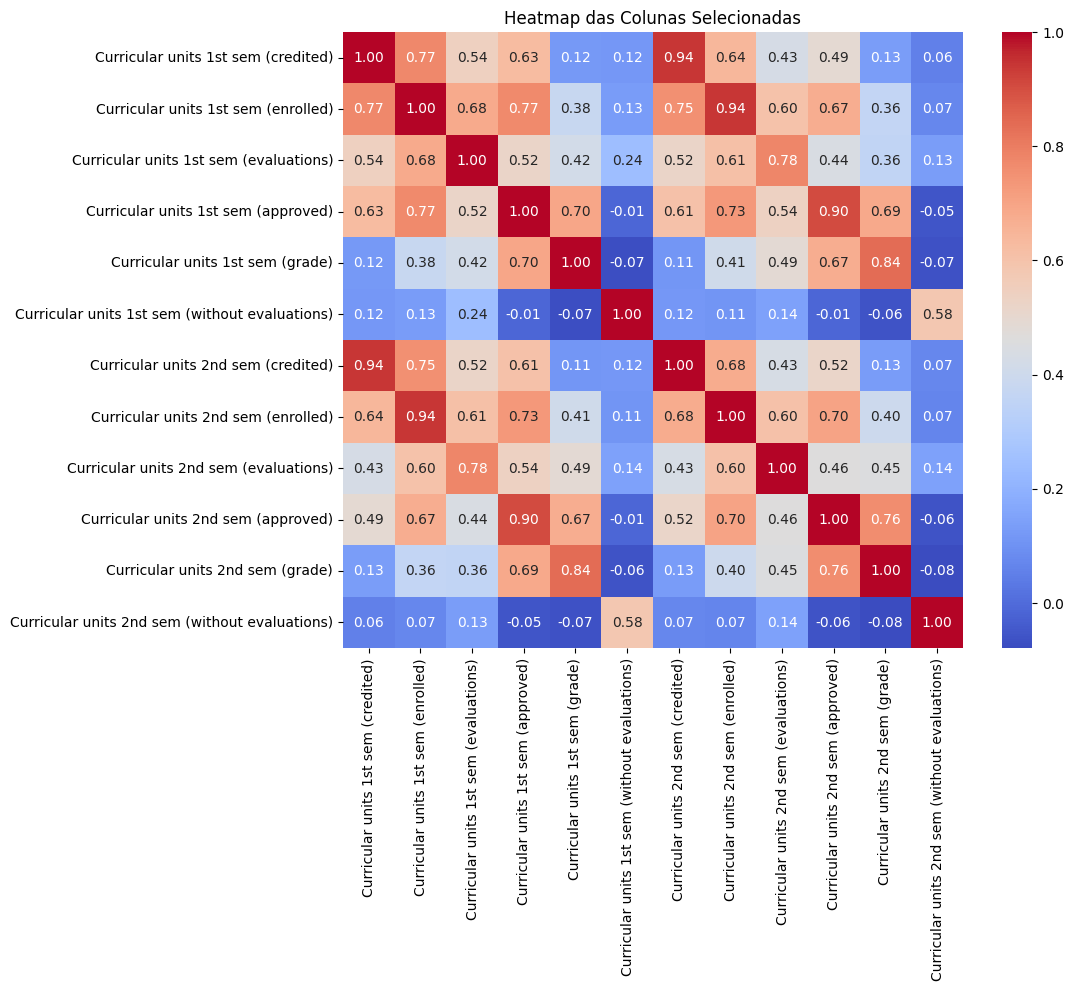

In [ ]:
#Irei focar o heatmap para melhor visualização nas variaveis de nota do curso.
zoom_col = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]


df_heatmap_zoom = df[zoom_col].corr()

# Visualiza o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap_zoom, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap das Colunas Selecionadas')
plt.show()

A principio, parece que os dados do primeiro e segundo semestre são bem semelhantes.

Apesar da forte relação, acho interessante manter esses dados para poder acompanhar e verificar padrões entre desempenho dos semestres e seu abandono.

Para melhorar a análise exploratória, fiz algumas questões iniciais que espero responder nessa análise.

1° pergunta:
- A Qualificação do Pai e da Mãe tem alguma relevância? e a Ocupação?

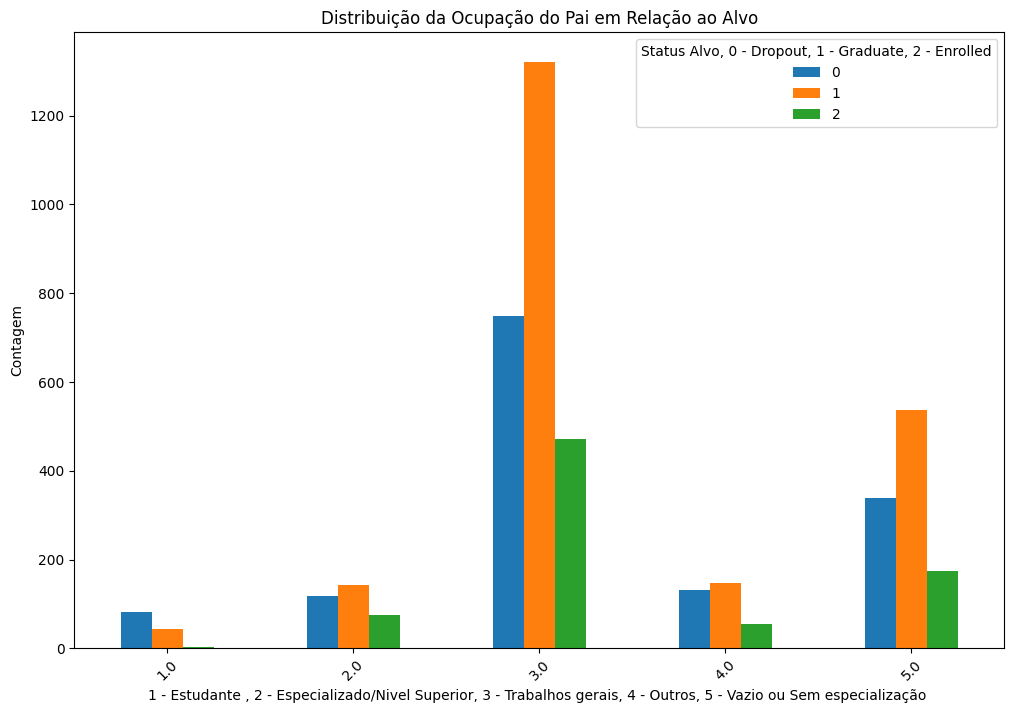

In [ ]:
# Agrupando os dados pela ocupação do pai e pela coluna alvo, e contando as ocorrências, após a categorização
occupation_target = df_nova_base.groupby(["Father's occupation", "Target"]).size().unstack()

# Plotando o gráfico de barras
occupation_target.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição da Ocupação do Pai em Relação ao Alvo")
plt.xlabel("1 - Estudante , 2 - Especializado/Nivel Superior, 3 - Trabalhos gerais, 4 - Outros, 5 - Vazio ou Sem especialização ")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()



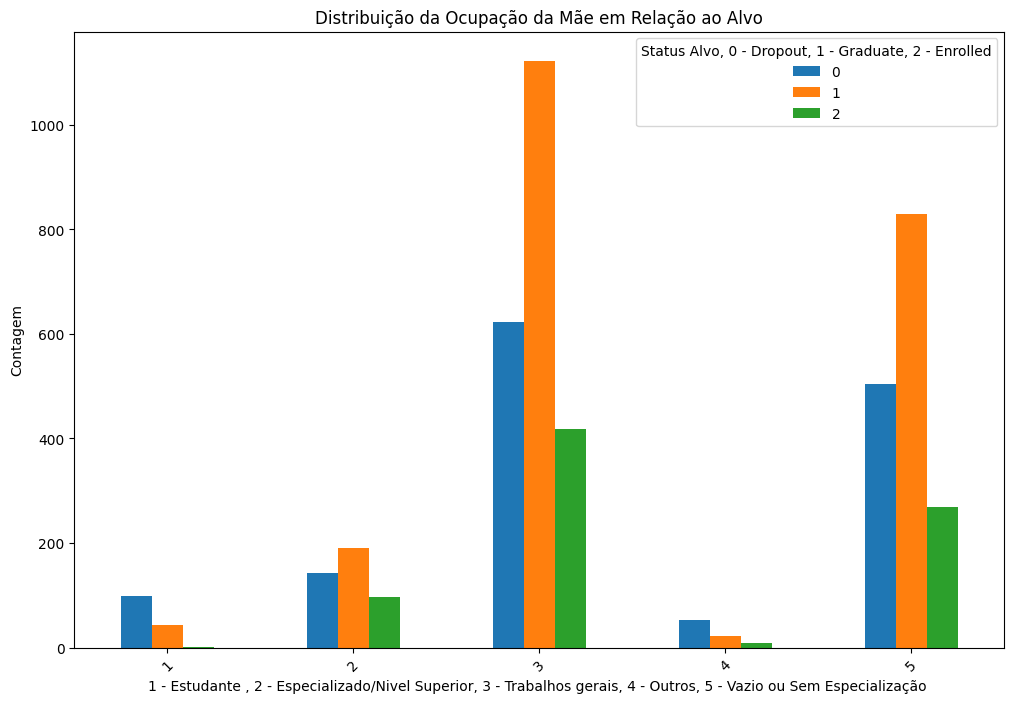

In [ ]:
# Agrupando os dados pela ocupação do pai e pela coluna alvo, e contando as ocorrências, após a categorização
occupation_target = df_nova_base.groupby(["Mother's occupation", "Target"]).size().unstack()

# Plotando o gráfico de barras
occupation_target.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição da Ocupação da Mãe em Relação ao Alvo")
plt.xlabel("1 - Estudante , 2 - Especializado/Nivel Superior, 3 - Trabalhos gerais, 4 - Outros, 5 - Vazio ou Sem Especialização ")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()


Analisando o gráfico de ocupação inicialmente, acredito que podemos ter uma noção que para os pais que estão na ocupação de ser apenas estudante, possuem uma maior taxa de abandono dos alunos.

Mas também, existem uma grande quantidade de amostras dentro dos trabalhadores não qualificados e trabalhos gerais. Trabalhos mais especificos, existem poucos dados.

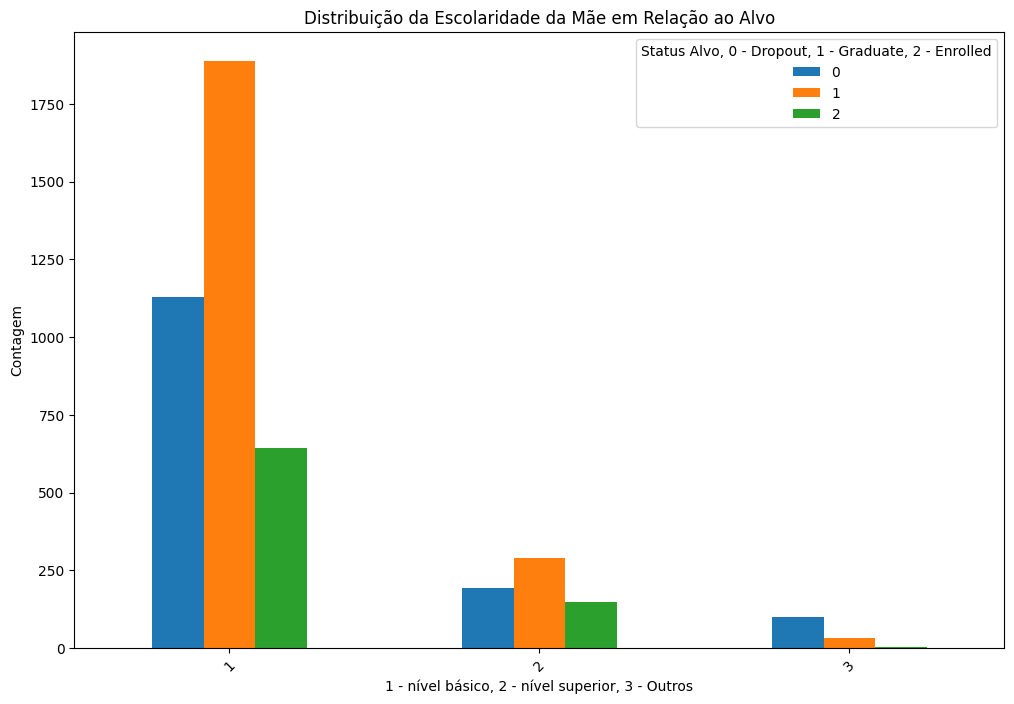

In [ ]:
# Agrupando os dados pela ocupação do pai e pela coluna alvo, e contando as ocorrências, após a categorização
occupation_target = df_nova_base.groupby(["Mother's qualification", "Target"]).size().unstack()

# Plotando o gráfico de barras
occupation_target.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição da Escolaridade da Mãe em Relação ao Alvo")
plt.xlabel("1 - nível básico, 2 - nível superior, 3 - Outros")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()


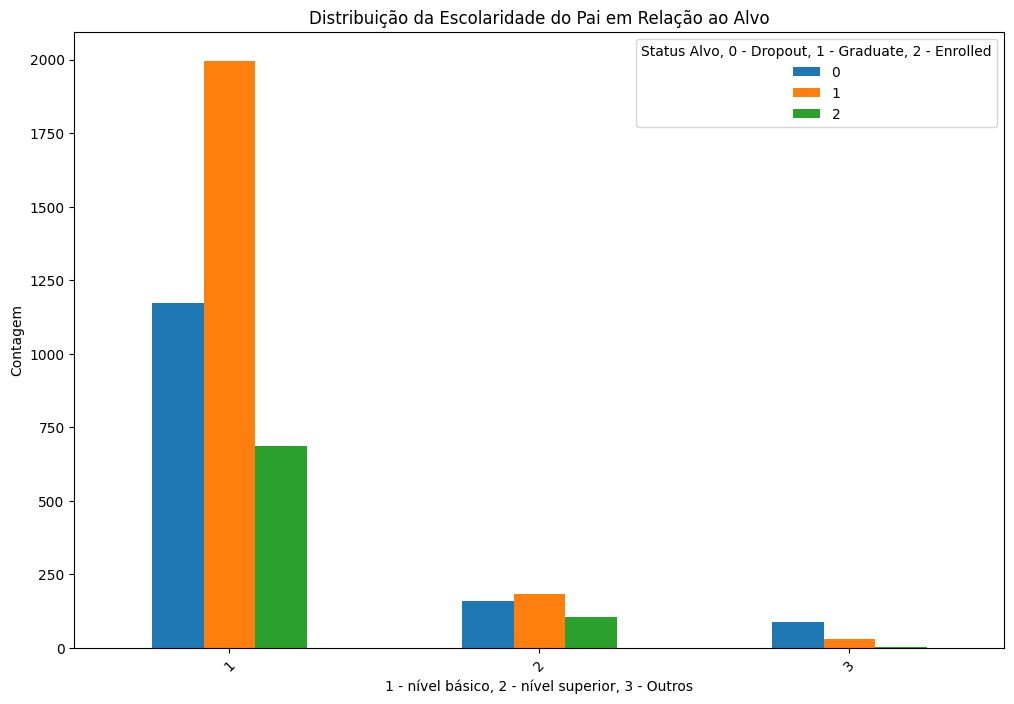

In [ ]:
# Agrupando os dados pela ocupação do pai e pela coluna alvo, e contando as ocorrências, após a categorização
occupation_target = df_nova_base.groupby(["Father's qualification", "Target"]).size().unstack()

# Plotando o gráfico de barras
occupation_target.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição da Escolaridade do Pai em Relação ao Alvo")
plt.xlabel("1 - nível básico, 2 - nível superior, 3 - Outros")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

Analisando os gráficos de Escolaridade dos pais, vemos dados bem distribuidos entre graduados e a taxa de abandono, não necessariamente aparenta ter um padrão, mas conseguimos visualizar uma taxa maior de abandono quando a educação dos pais é um pouco limitada.


2° Pergunta:
- A prioridade de escolha do curso é um fator essencial?

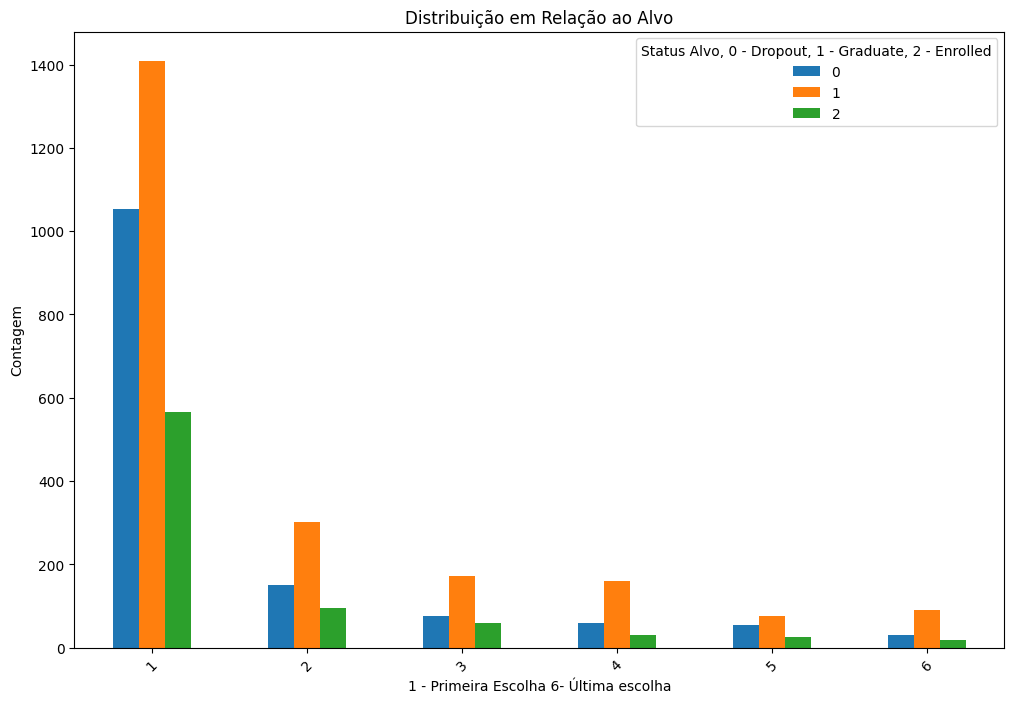

In [ ]:
escolha_prior = df_nova_base.groupby(["Application order", "Target"]).size().unstack()
# Plotando o gráfico de barras
escolha_prior.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("1 - Primeira Escolha 6- Última escolha")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

In [ ]:
count_choices = df.groupby(["Application order", "Target"]).size()
print(count_choices)

Application order  Target  
0                  Graduate       1
1                  Dropout     1053
                   Enrolled     565
                   Graduate    1408
2                  Dropout      150
                   Enrolled      96
                   Graduate     301
3                  Dropout       76
                   Enrolled      60
                   Graduate     173
4                  Dropout       58
                   Enrolled      31
                   Graduate     160
5                  Dropout       53
                   Enrolled      25
                   Graduate      76
6                  Dropout       31
                   Enrolled      16
                   Graduate      90
9                  Enrolled       1
dtype: int64



Como dito anteriormente, de acordo com o documento do dataset,

0 deveria ser a primeira escolha,

mas acho que existe um erro, sendo que o único valor de 0 é uma pessoa e ela se graduou, só se tiver considerando que 0 não foi uma escolha dela e o 1° seja a primeira escolha da pessoa, pois desse modo faria sentido a quantidade maior de amostras e pessoas que se graduaram.

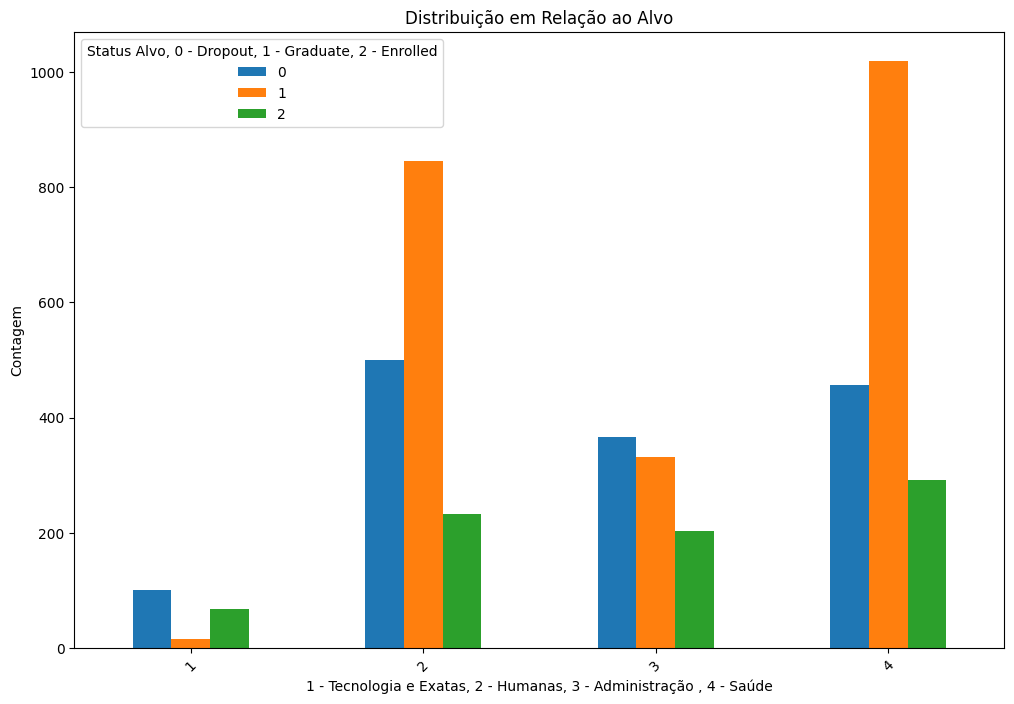

In [ ]:
curso = df_nova_base.groupby(["Course", "Target"]).size().unstack()
# Plotando o gráfico de barras
curso.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("1 - Tecnologia e Exatas, 2 - Humanas, 3 - Administração , 4 - Saúde")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

O gráfico de curso está bem distribuido, porém existe uma alta escolha nos cursos de saúde e humanas, talvez exista uma grande quantidade de graduados por serem cursos mais disputados.

Enquanto de exatas, por ter uma maior complexidade, teve uma alta taxa de abandono em comparação a taxa de sucesso.

Podemos também verificar quais são os cursos mais disputados por periodo.

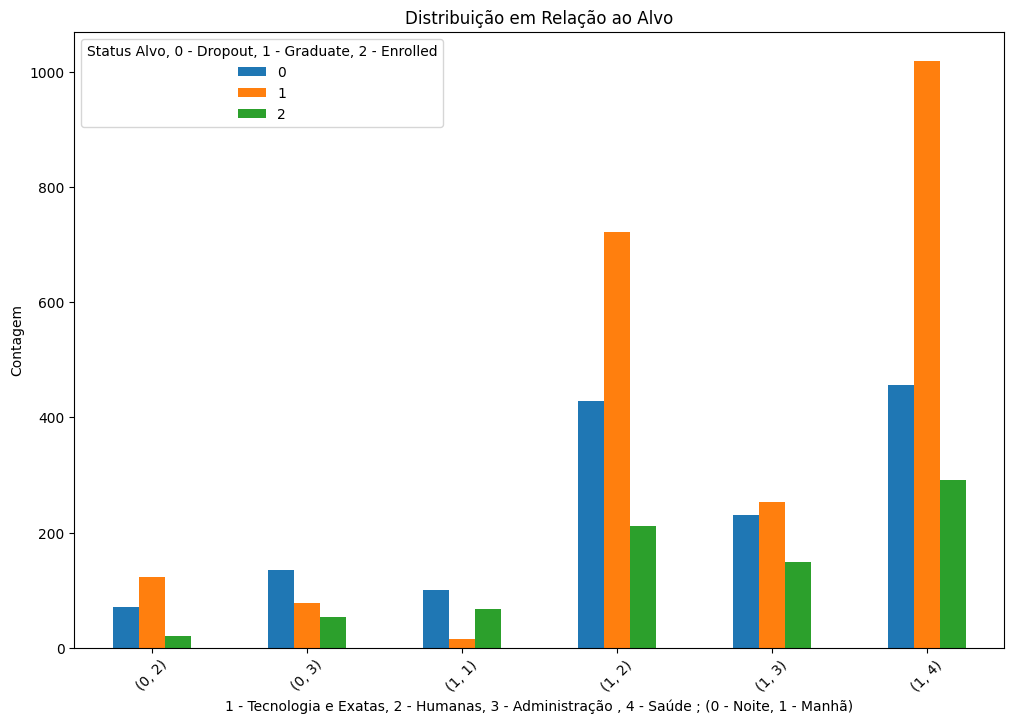

In [ ]:
periodo = df_nova_base.groupby(['Daytime/evening attendance\t','Course', 'Target']).size().unstack()

periodo.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("1 - Tecnologia e Exatas, 2 - Humanas, 3 - Administração , 4 - Saúde ; (0 - Noite, 1 - Manhã)")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

3° Pergunta:
- Se for o segundo curso, ele tem mais chances de ser graduado ou sair?

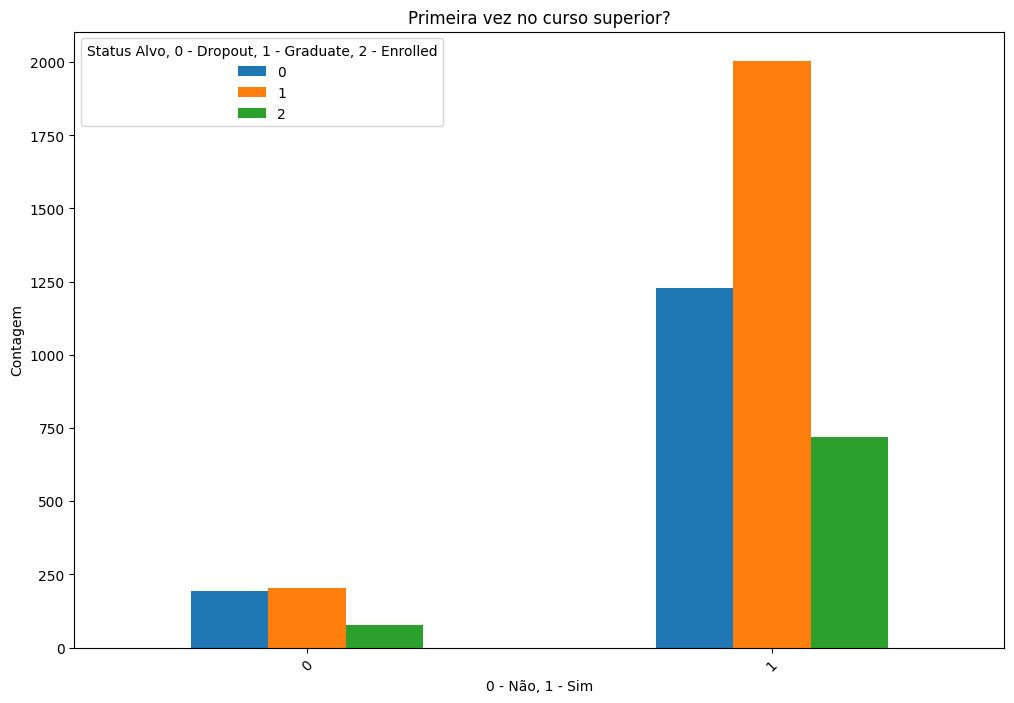

In [ ]:
graduado = df_nova_base.groupby(['Previous qualification', 'Target']).size().unstack()

graduado.plot(kind='bar', figsize=(12, 8))
plt.title("Primeira vez no curso superior?")
plt.xlabel("0 - Não, 1 - Sim")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo, 0 - Dropout, 1 - Graduate, 2 - Enrolled")
plt.xticks(rotation=45)
plt.show()

Apesar da desproporcionalidade das amostras, as chances de abandonarem o curso se for sua segunda graduação é bem alta, quase equivalente aos que já se formaram.

Pelo Heatmap, também foi possível visualizar que a coluna International e Nacionality tem uma correlação muito alta.

Pergunta 4:
- qual poderiamos remover se for o caso?

In [ ]:
# Listando a contagem de alunos por status de nacionalidade (Internacionais e Nacionais)
international_counts = df['International'].value_counts()
national_counts = df['Nacionality'].value_counts()

# Exibindo os resultados
print("Contagem de Alunos Internacionais:")
print("\n 0 - Nacional, 1 - Internacional\n")
print(international_counts)

print("\nContagem de Alunos por nacionalidade:\n")
print(national_counts)

Contagem de Alunos Internacionais:

 0 - Nacional, 1 - Internacional

International
0    4314
1     110
Name: count, dtype: int64

Contagem de Alunos por nacionalidade:

Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: count, dtype: int64


Por serem dados redundantes, a fim de otimizar um pouco o dataset, talvez seja interessante utilizar apenas a coluna de International, mediante a uma distribuição simplificada (0 ou 1)

Pergunta 5:

- Genero tem alguma prioridade (Ordinal)

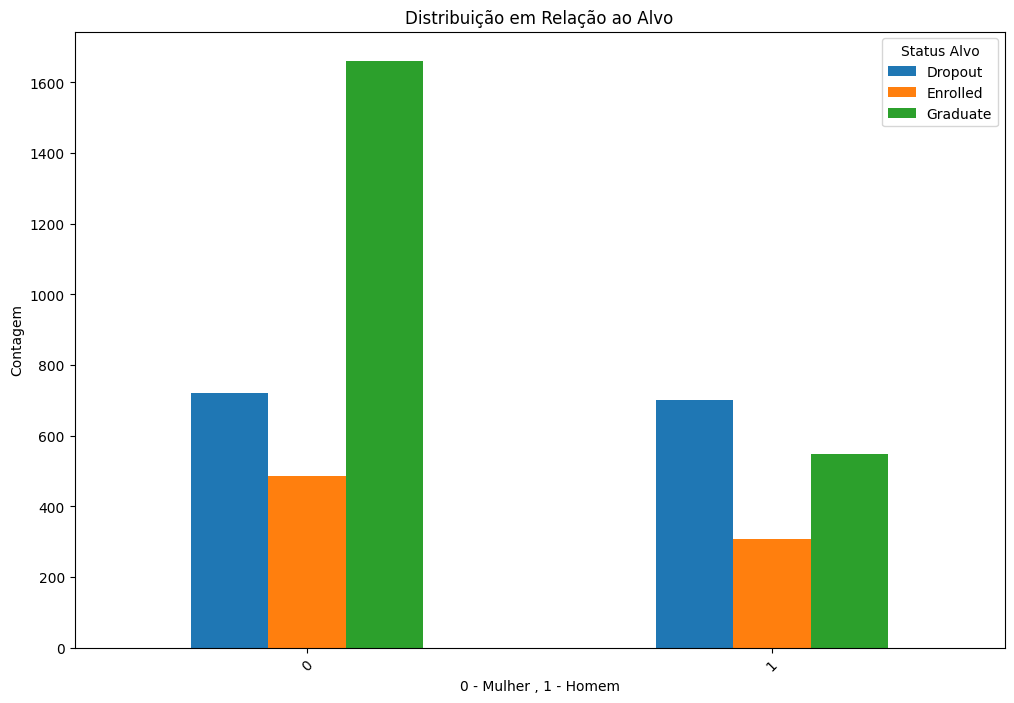

In [ ]:
#Vamos separar em genêros
genero = df.groupby(['Gender', 'Target']).size().unstack()

genero.plot(kind='bar', figsize=(12, 8))
plt.title("Distribuição em Relação ao Alvo")
plt.xlabel("0 - Mulher , 1 - Homem")
plt.ylabel("Contagem")
plt.legend(title="Status Alvo")
plt.xticks(rotation=45)
plt.show()

Existe uma maior quantidade de mulheres nesse dataset, junto com uma maior taxa de sucesso para as mulheres, mas há uma diferença pequena entre a taxa de abandono entre generos.

Pergunta 6:
- Estar em débito com a faculdade auxilia no drop do curso (Debtor, Tuiton fees up to date)

In [ ]:
# Contando os alunos por status e por situação de débito
debtor_counts = df.groupby(['Debtor', 'Target']).size().unstack(fill_value=0)
tuition_fees_counts = df.groupby(['Tuition fees up to date', 'Target']).size().unstack(fill_value=0)

# Exibindo os resultados para cada coluna
print("Distribuição de Status por Situação de Débito (Debtor):")
print(debtor_counts)

print("\nDistribuição de Status por Situação de Mensalidade em Dia (Tuition fees up to date):")
print(tuition_fees_counts)


Distribuição de Status por Situação de Débito (Debtor):
Target  Dropout  Enrolled  Graduate
Debtor                             
0          1109       704      2108
1           312        90       101

Distribuição de Status por Situação de Mensalidade em Dia (Tuition fees up to date):
Target                   Dropout  Enrolled  Graduate
Tuition fees up to date                             
0                            457        42        29
1                            964       752      2180


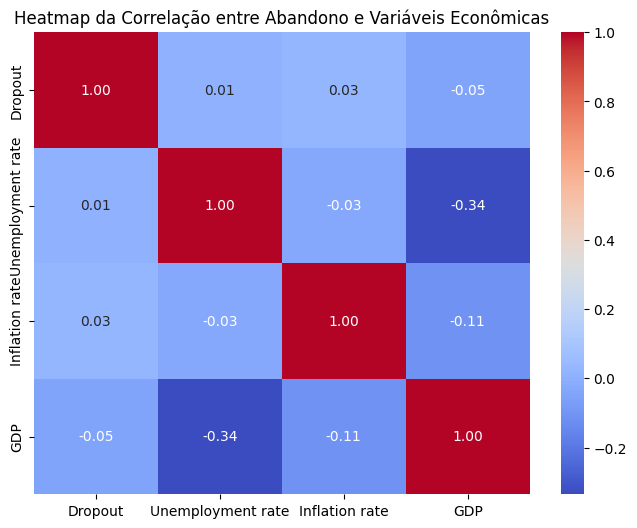

In [ ]:
# Transformando o status de abandono em uma variável binária
df['Dropout'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Calculando a correlação entre Dropout e as variáveis econômicas
economic_corr = df[['Dropout', 'Unemployment rate', 'Inflation rate', 'GDP']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(economic_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap da Correlação entre Abandono e Variáveis Econômicas")
plt.show()

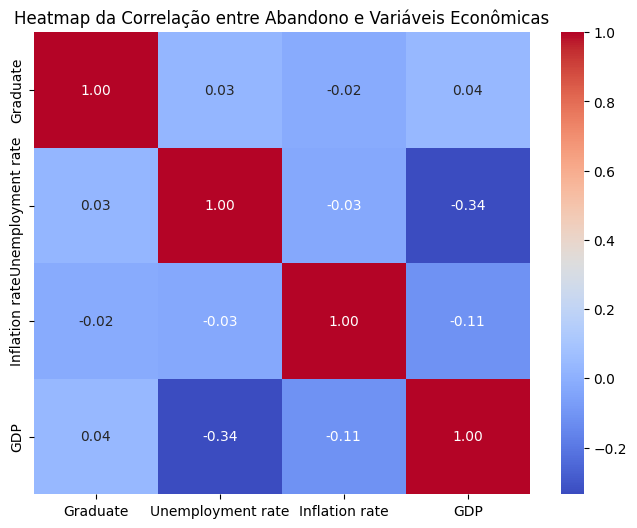

In [ ]:
# Transformando o status de abandono em uma variável binária
df['Graduate'] = df['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Calculando a correlação entre Dropout e as variáveis econômicas
economic_corr = df[['Graduate', 'Unemployment rate', 'Inflation rate', 'GDP']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(economic_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap da Correlação entre Abandono e Variáveis Econômicas")
plt.show()

A correlação com relação ao abandono e graduação, não existe uma relação muito forte, mas entre as váriaveis como PIB e taxa de abandono, possuem uma relação um pouco maior e que faz sentido, mas não vem ao caso.

7° Pergunta:

- Qual a média de idade de quem se matricula na faculdade?

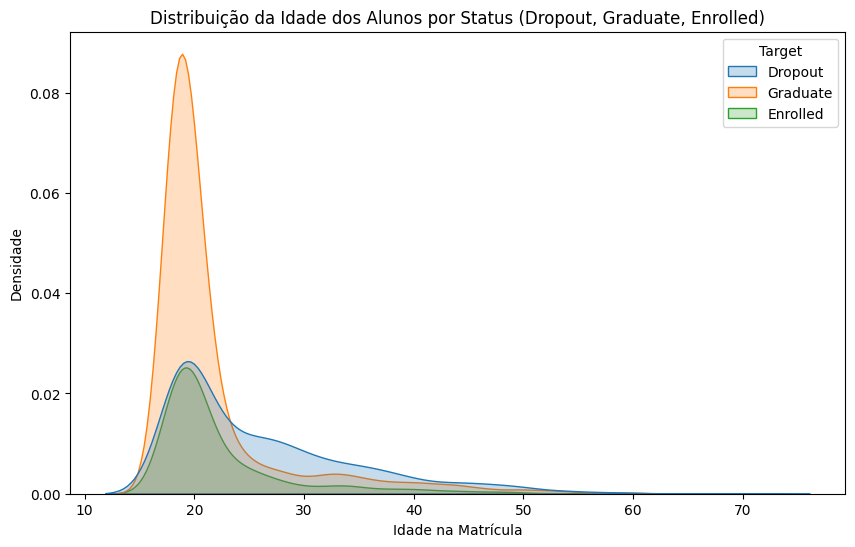

In [ ]:
# Plotando o gráfico de densidade para a idade na matrícula, separado pelo status do aluno (Target)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age at enrollment', hue='Target', fill=True)
plt.title("Distribuição da Idade dos Alunos por Status (Dropout, Graduate, Enrolled)")
plt.xlabel("Idade na Matrícula")
plt.ylabel("Densidade")
plt.show()

8° Pergunta:

- Se for Bolsista ele se mantém?

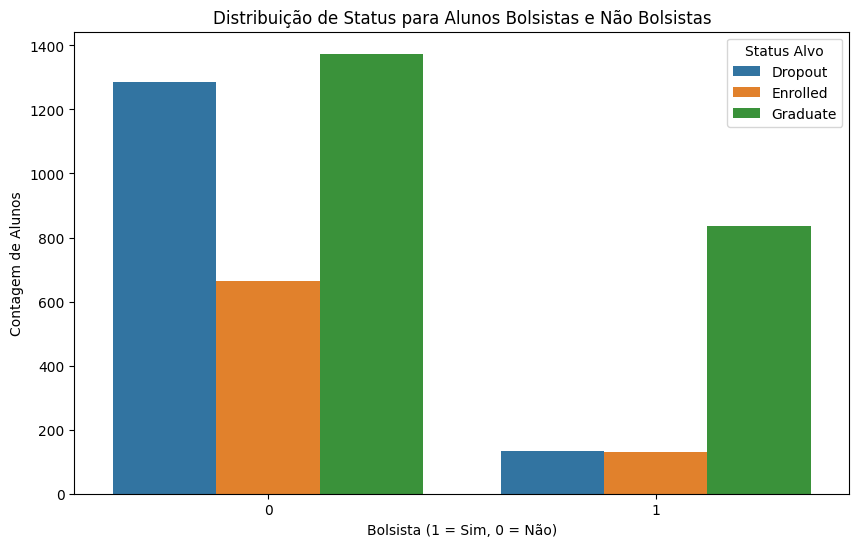

In [ ]:
# Agrupando os dados por "Scholarship holder" e "Target" para contar as ocorrências
bolsistas = df.groupby(['Scholarship holder', 'Target']).size().unstack()

# Resetando o índice para facilitar o uso com seaborn
bolsistas = bolsistas.reset_index().melt(id_vars=['Scholarship holder'], var_name='Status', value_name='Count')

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=bolsistas, x='Scholarship holder', y='Count', hue='Status')
plt.title("Distribuição de Status para Alunos Bolsistas e Não Bolsistas")
plt.xlabel("Bolsista (1 = Sim, 0 = Não)")
plt.ylabel("Contagem de Alunos")
plt.legend(title="Status Alvo")
plt.show()

Analisando o gráfico, a quantidade de alunos bolsista é pequena, mas a taxa de sucesso é muito maior que os de abandono dos bolsistas, o que faz sentido.



A última análise que iremos fazer é se vale ou não manter o Target Enrolled, chegando a conclusão que dependendo do modelo de IA a ser usado, é interessante remover ele.

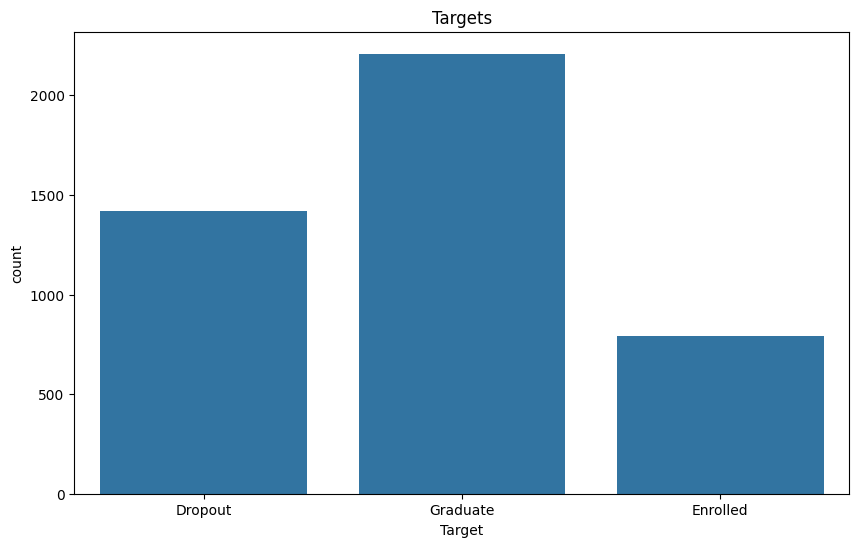

In [ ]:
#Visualização em forma de gráfico

plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df)
plt.title('Targets')
plt.show()

A quantidade de amostras na classe Enrolled é consideravelmente grande, mas focalizando nossos resultados em predizer se ele irá se graduar ou irá abandonar o curso.

Talvez seja interessante simplificar a classe para duas variáveis

# 4- Treinamento de Modelo

Treinamento nos modelos
Naive Bayes, KNN, e Redes Neurais

## Rede Neural

### Com pré-processamento, removendo a classe Enrolled

In [ ]:
df_model_neural = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])
# Removendo as linhas onde 'Target' é igual a '(2) Enrolled'
df_model_neural = df_model_neural[df_model_neural['Target'] != 2].reset_index(drop=True)

# Verificando se existem apenas graduados e abandono
print(df_model_neural['Target'].value_counts())

Target
1    2209
0    1421
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
# Separando as variáveis de entrada e a variável alvo
X = df_model_neural.drop('Target', axis=1)
y = df_model_neural['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de Redes Neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)




model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

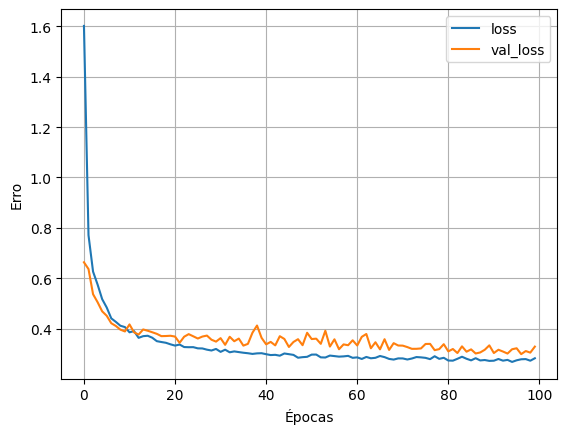

In [ ]:
plot_loss(history)

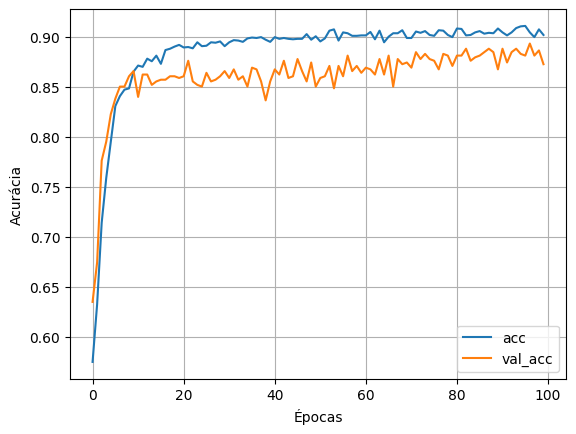

In [ ]:
plot_acc(history)

In [ ]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.8870523415977961


### Sem pré-processamento:

In [ ]:
df_model_base_neural = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep=';', index_col=None)
df_model_base_neural['Target'] = df_model_base_neural['Target'].map({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})


In [ ]:
from sklearn.model_selection import train_test_split
# Separando as variáveis de entrada e a variável alvo
X = df_model_neural.drop('Target', axis=1)
y = df_model_neural['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de Redes Neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)




model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

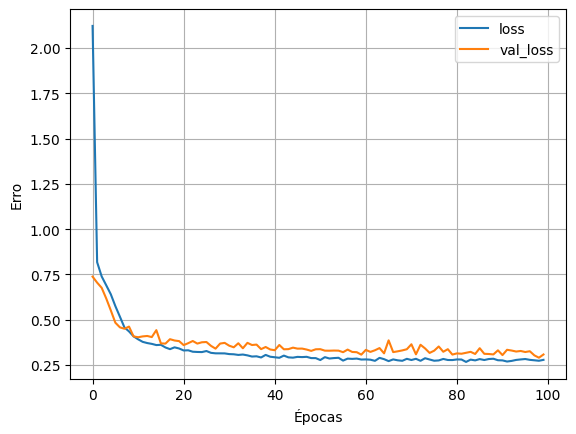

In [ ]:
plot_loss(history)

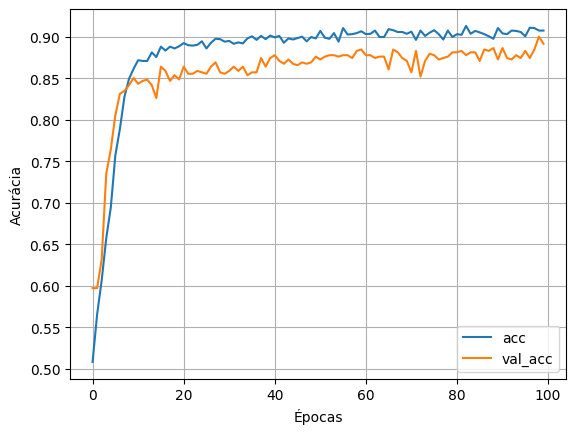

In [ ]:
plot_acc(history)

In [ ]:
y_pred = model.predict(X_test).reshape(-1)

accuracy_score(np.round(y_pred), y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.9049586776859504

### Com pré-processamento, sem remover a classe Enrolled

In [ ]:
df_model_neural_Enrolled = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])
print(df_model_neural_Enrolled['Target'].value_counts())

Target
1    2209
0    1421
2     794
Name: count, dtype: int64


In [ ]:
# Separando as variáveis de entrada e a variável alvo
X = df_model_neural.drop('Target', axis=1)
y = df_model_neural['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de Redes Neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)




model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

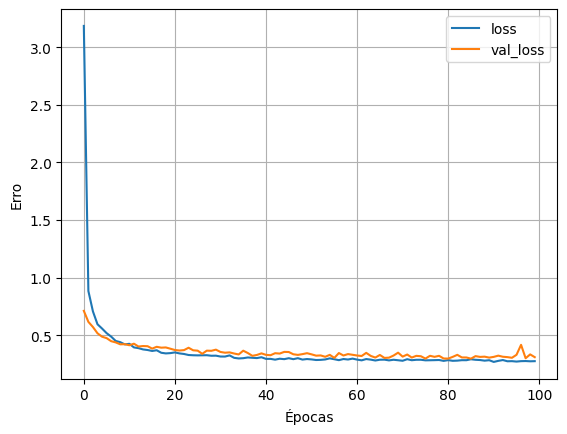

In [ ]:
plot_loss(history)

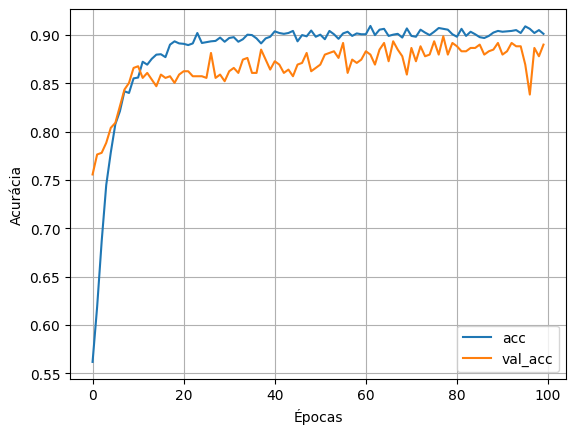

In [ ]:
plot_acc(history)

In [ ]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.9090909090909091

## KNN

### Com pré-processamento e removendo a classe Enrolled

In [ ]:
df_model_KNN = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])

# Removendo as linhas onde 'Target' é igual a '(2) Enrolled'
df_model_KNN =df_model_KNN[df_model_KNN['Target'] != 2].reset_index(drop=True)

# Verificando se existem apenas graduados e abandono
print(df_model_KNN['Target'].value_counts())

Target
1    2209
0    1421
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
# Separando as variáveis de entrada e a variável alvo
X = df_model_KNN.drop('Target', axis=1)
y = df_model_KNN['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print("KNN Acuracia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))

KNN Acuracia: 0.8484848484848485
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       277
           1       0.83      0.95      0.89       449

    accuracy                           0.85       726
   macro avg       0.86      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726



### KNN sem o pré-processamento


In [ ]:
df_base_knn = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep=';', index_col=None)
df_base_knn['Target'] = df_base_knn['Target'].map({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})


df_model_base = df_base_knn

# Removendo as linhas onde 'Target' é igual a '(2) Enrolled'
#df_model_base = df_base_knn[df_base_knn['Target'] != 2].reset_index(drop=True)

# Verificando as mudanças
print(df_base_knn['Target'].value_counts())

Target
1    2209
0    1421
2     794
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separando as variáveis de entrada e a variável alvo
X = df_model_base.drop('Target', axis=1)
y = df_model_base['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print("KNN Acuracia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))

KNN Acuracia: 0.6101694915254238
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59       316
           1       0.62      0.85      0.71       418
           2       0.33      0.13      0.19       151

    accuracy                           0.61       885
   macro avg       0.54      0.50      0.50       885
weighted avg       0.58      0.61      0.58       885



### KNN com pré-processamento mantendo a classe Enrolled

In [ ]:
df_model_KNN_Enrolled = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])

# Verificando se existem apenas graduados e abandono
print(df_model_KNN_Enrolled['Target'].value_counts())

Target
1    2209
0    1421
2     794
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separando as variáveis de entrada e a variável alvo
X = df_model_KNN_Enrolled.drop('Target', axis=1)
y = df_model_KNN_Enrolled['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print("KNN Acuracia:", accuracy_score(y_test, y_pred_knn))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))

KNN Acuracia: 0.6644067796610169
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67       316
           1       0.66      0.91      0.76       418
           2       0.32      0.16      0.21       151

    accuracy                           0.66       885
   macro avg       0.59      0.55      0.55       885
weighted avg       0.65      0.66      0.64       885



## Naive Bayes

### Com pré-processamento e removendo a classe Enrolled

In [ ]:
df_model_NB = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])

# Removendo as linhas onde 'Target' é igual a '(2) Enrolled'
df_model_NB = df_model_NB[df_model_NB['Target'] != 2].reset_index(drop=True)

# Verificando se existem apenas graduados e abandono
print(df_model_NB['Target'].value_counts())

Target
1    2209
0    1421
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separando as variáveis de entrada e a variável alvo
X = df_model_NB.drop('Target', axis=1)
y = df_model_NB['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB


# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gau = gaussian_nb.predict(X_test)
print("Gaussian Naive Bayes Acuracia:", accuracy_score(y_test, y_pred_gau))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gau))

# Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_berno = bernoulli_nb.predict(X_test)
print("\nBernoulli Acuracia:", accuracy_score(y_test, y_pred_berno))
print("Relatório:\n", classification_report(y_test, y_pred_berno))

Gaussian Naive Bayes Acuracia: 0.8360881542699724
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       277
           1       0.84      0.92      0.87       449

    accuracy                           0.84       726
   macro avg       0.84      0.81      0.82       726
weighted avg       0.84      0.84      0.83       726


Bernoulli Acuracia: 0.8402203856749312
Relatório:
               precision    recall  f1-score   support

           0       0.90      0.65      0.76       277
           1       0.82      0.96      0.88       449

    accuracy                           0.84       726
   macro avg       0.86      0.80      0.82       726
weighted avg       0.85      0.84      0.83       726



### Sem pré-processamento

In [ ]:
df_model_base_NB = pd.read_csv('Predict Student Dropout and Academic Success.csv', sep=';', index_col=None)
df_model_base_NB['Target'] = df_model_base_NB['Target'].map({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})


In [ ]:
from sklearn.model_selection import train_test_split


# Separando as variáveis de entrada e a variável alvo
X = df_model_base_NB.drop('Target', axis=1)
y = df_model_base_NB['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Distribuição de classes no conjunto de teste:")
print(y_test.value_counts())


Distribuição de classes no conjunto de teste:
Target
1    418
0    316
2    151
Name: count, dtype: int64


In [ ]:
# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gau = gaussian_nb.predict(X_test)
print("Gaussian Naive Bayes Acuracia:", accuracy_score(y_test, y_pred_gau))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gau))

# Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_berno = bernoulli_nb.predict(X_test)
print("\nBernoulli Acuracia:", accuracy_score(y_test, y_pred_berno))
print("Relatório:\n", classification_report(y_test, y_pred_berno))

Gaussian Naive Bayes Acuracia: 0.6994350282485876
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.69      0.74       316
           1       0.71      0.86      0.78       418
           2       0.37      0.26      0.31       151

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.61       885
weighted avg       0.69      0.70      0.69       885


Bernoulli Acuracia: 0.6519774011299435
Relatório:
               precision    recall  f1-score   support

           0       0.86      0.54      0.67       316
           1       0.62      0.95      0.75       418
           2       0.18      0.06      0.09       151

    accuracy                           0.65       885
   macro avg       0.56      0.52      0.50       885
weighted avg       0.63      0.65      0.61       885



### Com pré-processamento e mantendo a classe Enrolled

In [ ]:
df_model_NB_Enrolled = df_dummy.drop(columns = ['Marital status', 'Application mode', 'Nacionality', 'Educational special needs', 'Unemployment rate', 'Inflation rate', 'GDP'])


# Verificando se existem apenas graduados e abandono
print(df_model_NB_Enrolled['Target'].value_counts())

Target
1    2209
0    1421
2     794
Name: count, dtype: int64


In [ ]:
# Separando as variáveis de entrada e a variável alvo
X = df_model_NB_Enrolled.drop('Target', axis=1)
y = df_model_NB_Enrolled['Target']

# Dividindo os dados em conjuntos de treinamento e teste com  base na recomendação (20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_gau = gaussian_nb.predict(X_test)
print("Gaussian Naive Bayes Acuracia:", accuracy_score(y_test, y_pred_gau))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gau))

# Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_berno = bernoulli_nb.predict(X_test)
print("\nBernoulli Acuracia:", accuracy_score(y_test, y_pred_berno))
print("Relatório:\n", classification_report(y_test, y_pred_berno))

Gaussian Naive Bayes Acuracia: 0.6225988700564972
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.50      0.61       316
           1       0.77      0.73      0.75       418
           2       0.31      0.58      0.40       151

    accuracy                           0.62       885
   macro avg       0.62      0.60      0.59       885
weighted avg       0.69      0.62      0.64       885


Bernoulli Acuracia: 0.6587570621468927
Relatório:
               precision    recall  f1-score   support

           0       0.84      0.57      0.68       316
           1       0.65      0.89      0.75       418
           2       0.29      0.19      0.23       151

    accuracy                           0.66       885
   macro avg       0.60      0.55      0.55       885
weighted avg       0.66      0.66      0.64       885

